# Final Project 3
---
Kelompok 2:
<ol>
<li>Immantaka Juniarsa</li>
<li>Widawati Annisa Putri</li>
<li>Muhammad Farhan Atsar Ghiffari</li>
</ol>

dataset : https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

# Library

In [1]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Split data
from sklearn.model_selection import train_test_split,GridSearchCV

# Scaling
from sklearn.preprocessing import StandardScaler

# Sampling
from imblearn.over_sampling import SMOTE

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix

# proses bar
from tqdm import tqdm

# filter warnings
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
data = pd.read_csv('Datasets\heart_failure_clinical_records_dataset.csv')
df = data.copy()
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Missing Value

In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# EDA

## Correlation

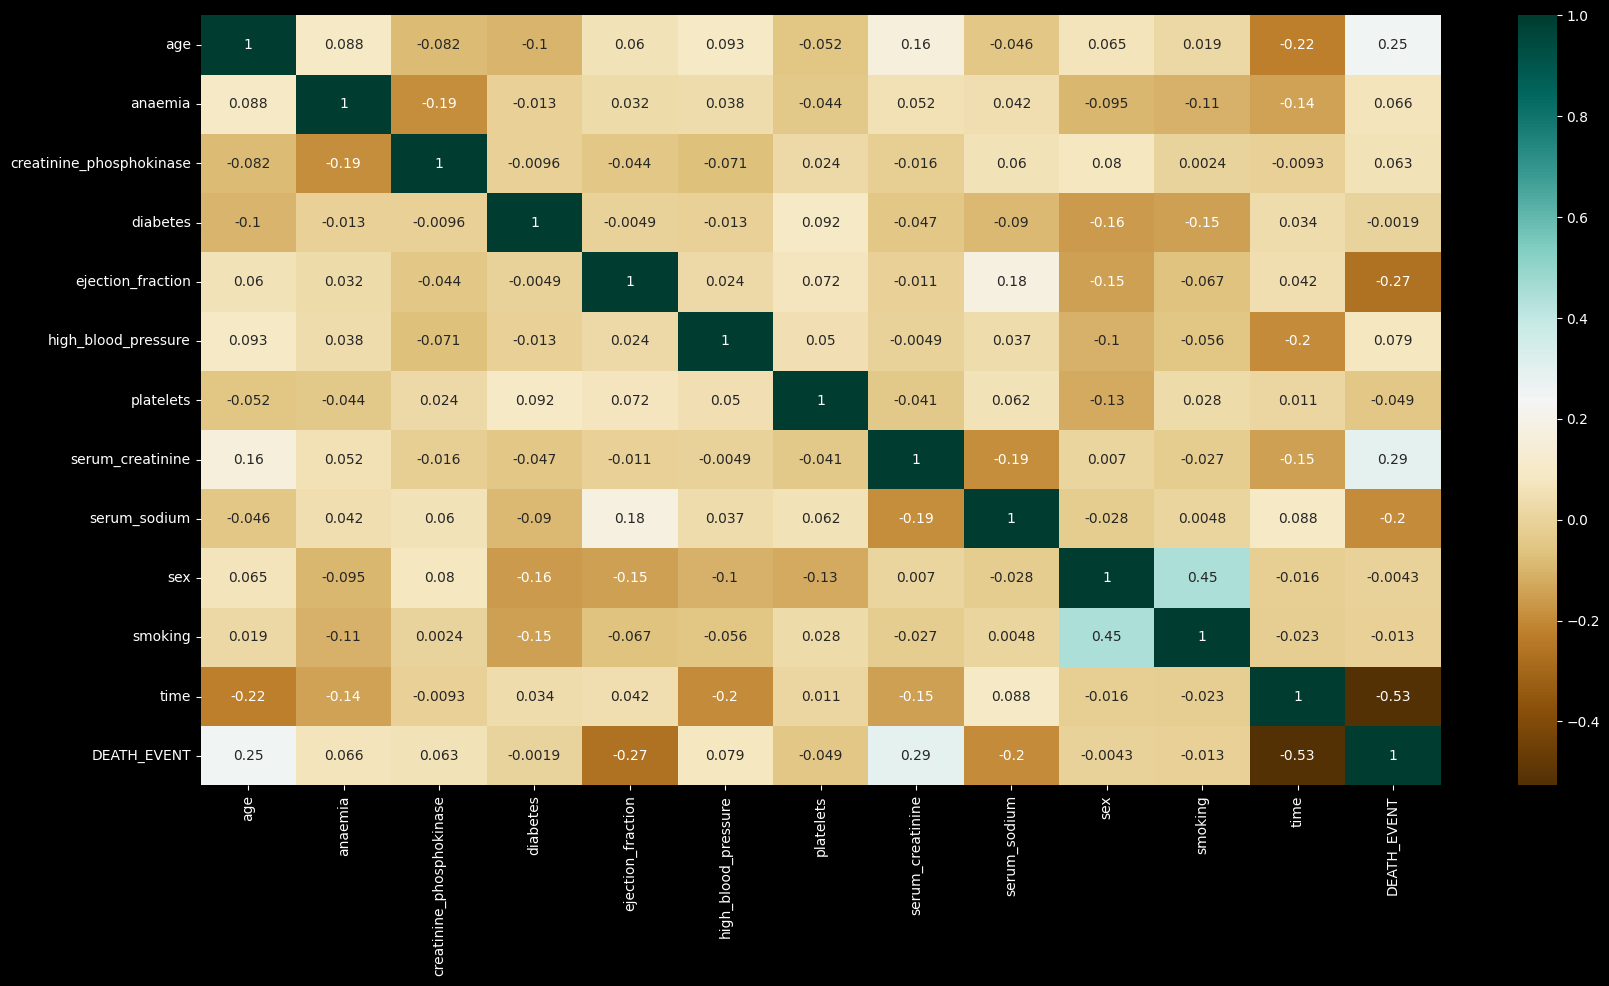

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='BrBG')
plt.show()

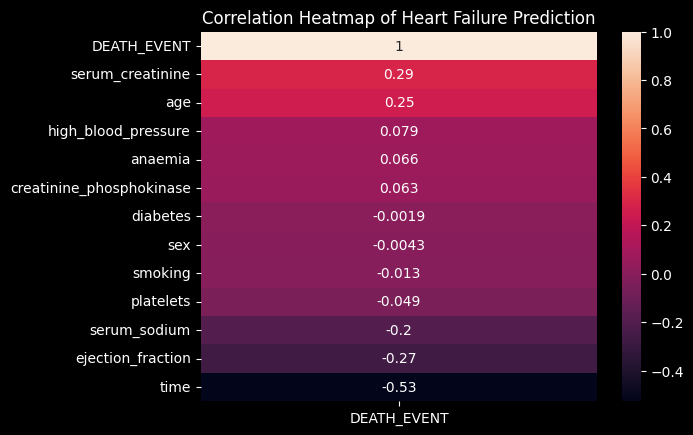

In [6]:
sns.heatmap(df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False),
                                                   annot = True)

plt.title('Correlation Heatmap of Heart Failure Prediction')
plt.show()

Dapat terlihat pada tabel di atas, bahwa nilai korelasi masing-masing variabel terhadap variabel `DEATH_EVENT` menunjukkan angka yang cukup kecil. Variabel yang memiliki korelasi yang cukup tinggi terhadap variabel `DEATH_EVENT` adalah `serum_creatinine` dan variabel yang memiliki korelasi sangat rendah terhadap variabel `DEATH_EVENT` adalah variabel `time`

## Outlier

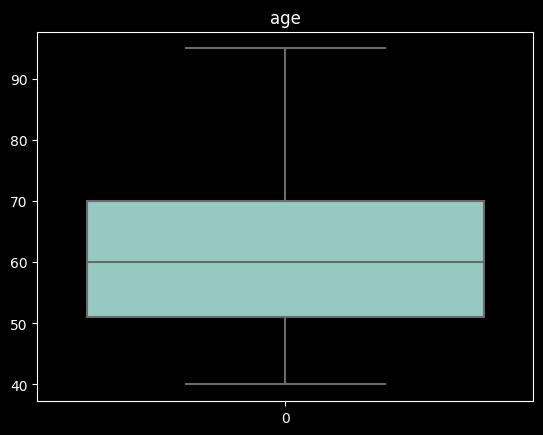

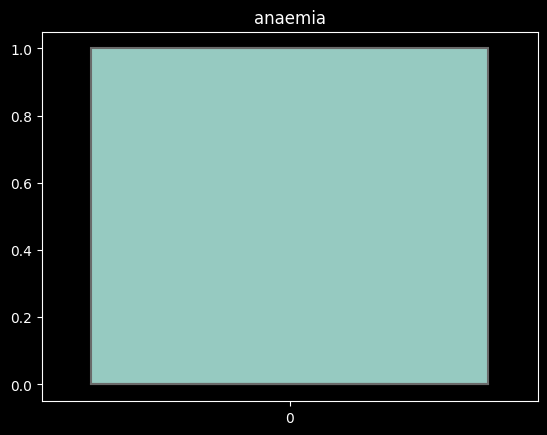

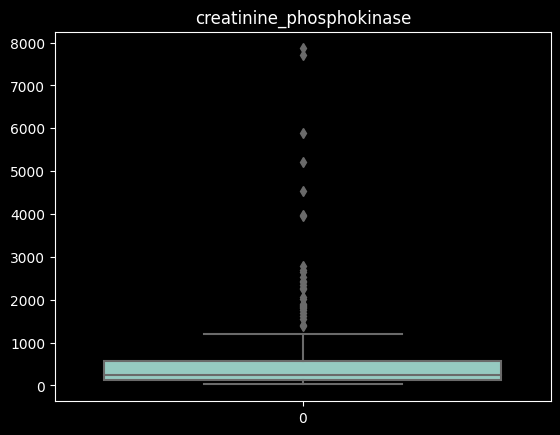

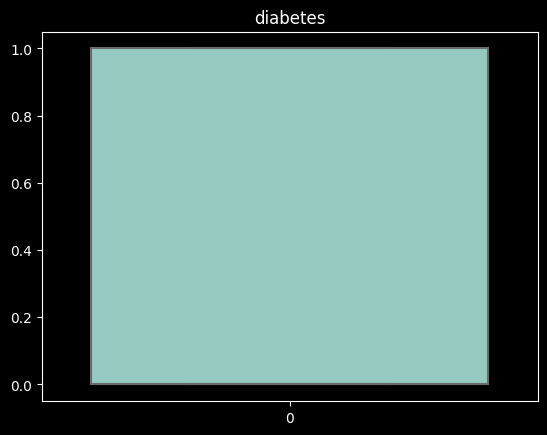

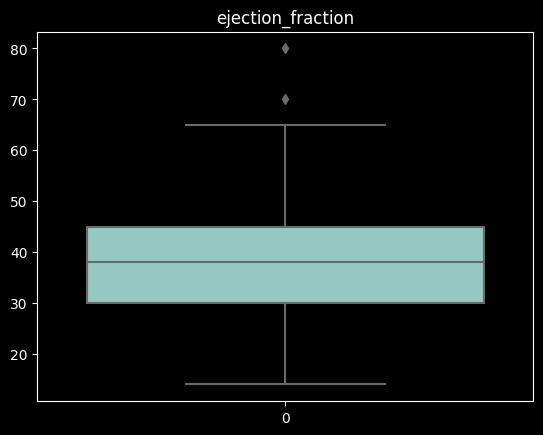

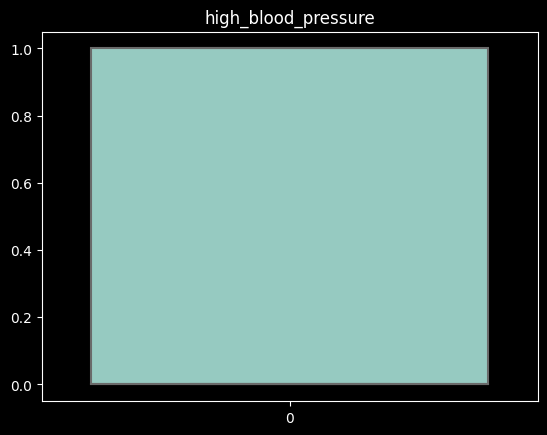

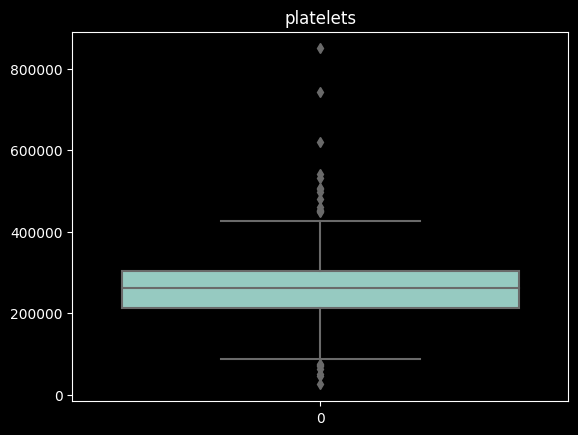

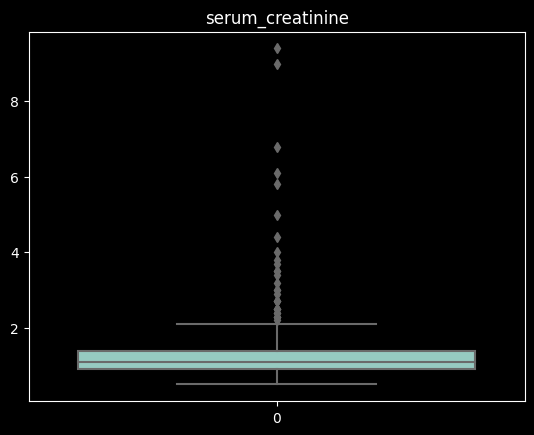

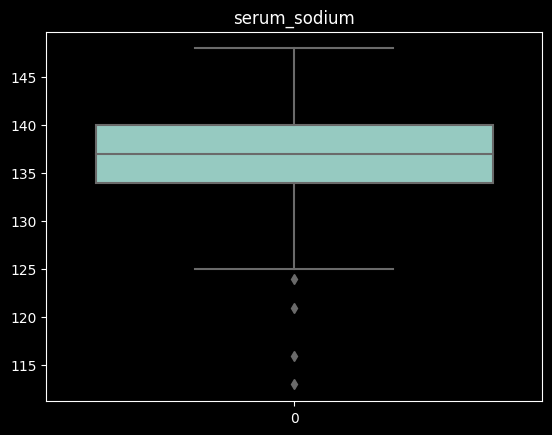

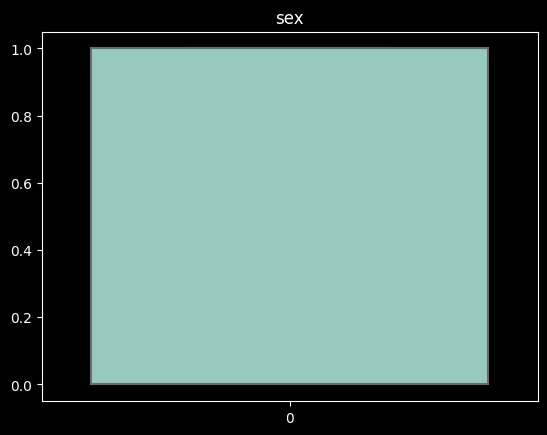

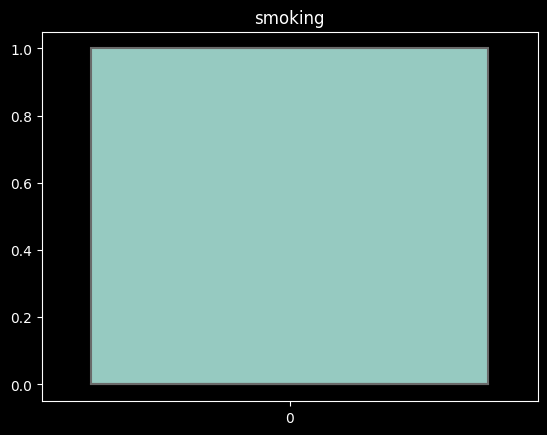

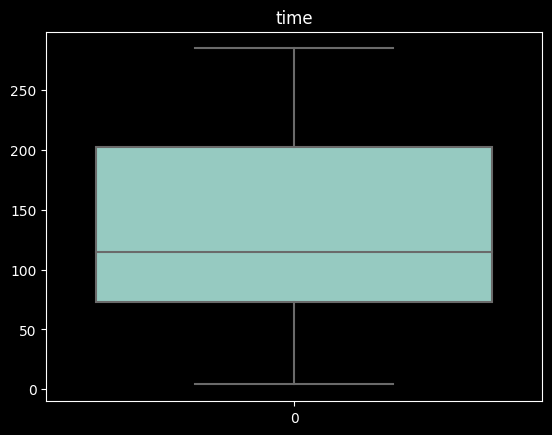

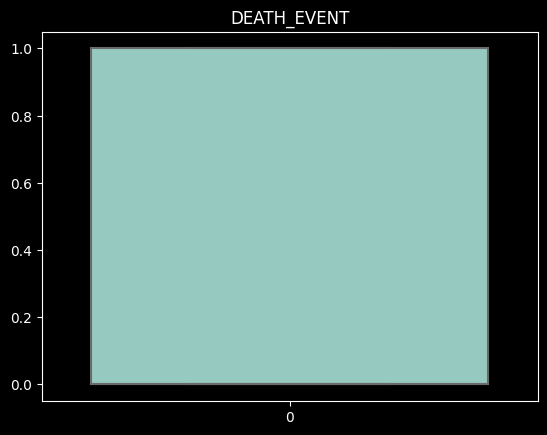

In [7]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()
    

dapat dilihat bahwa data memiliki outlier, dikarenakan data yang tidak terlalu banyak, maka outlier tidak dihapus

## melihat jumlah kelas pada variabel target

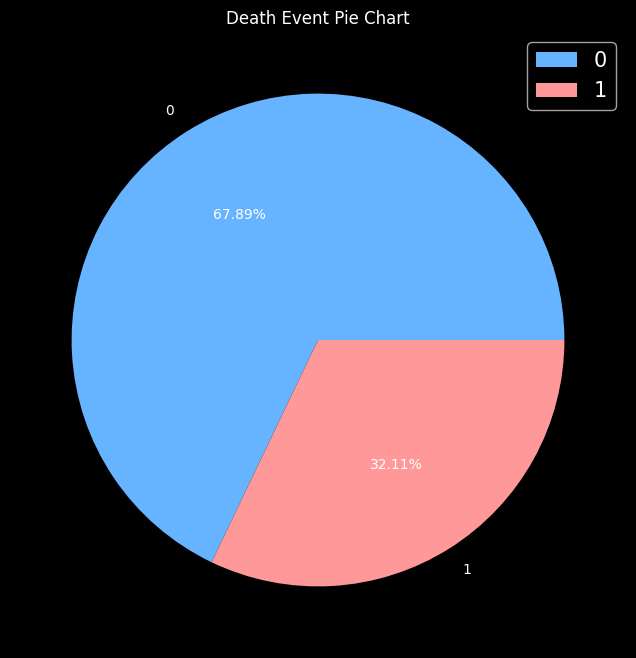

In [8]:
plt.figure(figsize=(10,8))
plt.pie(df['DEATH_EVENT'].value_counts(), labels=['0','1'], autopct='%.2f%%', colors=['#66b3ff','#ff9999'])
plt.title('Death Event Pie Chart')
plt.legend( loc = 'upper right', prop={'size': 15})
plt.show()

dapat dilihat bahwa variabel target tidak imbalance, sehingga tidak perlu dilakukan oversampling atau undersampling. tetapi kita akan membandingkan hasilnya dengan menggunakan sampling dan tanpa sampling.

# Preprocessing

## Select Feature

In [9]:
df.drop(columns=['time','serum_sodium','ejection_fraction'], inplace=True)

In [10]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,platelets,serum_creatinine,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,1,265000.00,1.9,1,0,1
1,55.0,0,7861,0,0,263358.03,1.1,1,0,1
2,65.0,0,146,0,0,162000.00,1.3,1,1,1
3,50.0,1,111,0,0,210000.00,1.9,1,0,1
4,65.0,1,160,1,0,327000.00,2.7,0,0,1


## Split Data

In [11]:
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [12]:
# dengan SMOTE
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

## Scaling Data

In [13]:
scaler = StandardScaler()

In [14]:
# scaling data tanpa SMOTE
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# scaling data dengan SMOTE
X_train_sm_scaled = scaler.fit_transform(X_train_sm)
X_test_sm_scaled = scaler.transform(X_test)

# Modeling

## Logistic Regression

## Model Logistic Regression.

In [15]:
# Logistic Regression
logreg = LogisticRegression()

In [16]:
# tanpa SMOTE
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

In [17]:
# dengan SMOTE
logreg.fit(X_train_sm_scaled, y_train_sm)
y_pred_logreg_sm = logreg.predict(X_test_sm_scaled)

## Evaluation Logistic Regression.

### Accuracy

In [18]:
# evaluation tanpa SMOTE
print('Logistic Regression tanpa SMOTE')
print('Accuracy Score :', accuracy_score(y_test, y_pred_logreg))

# evaluation dengan SMOTE
print('Logistic Regression dengan SMOTE')
print('Accuracy Score :', accuracy_score(y_test, y_pred_logreg_sm))

Logistic Regression tanpa SMOTE
Accuracy Score : 0.6533333333333333
Logistic Regression dengan SMOTE
Accuracy Score : 0.66


### Confusion Matrix

Text(0.5, 1.0, 'Logistic Regression dengan SMOTE')

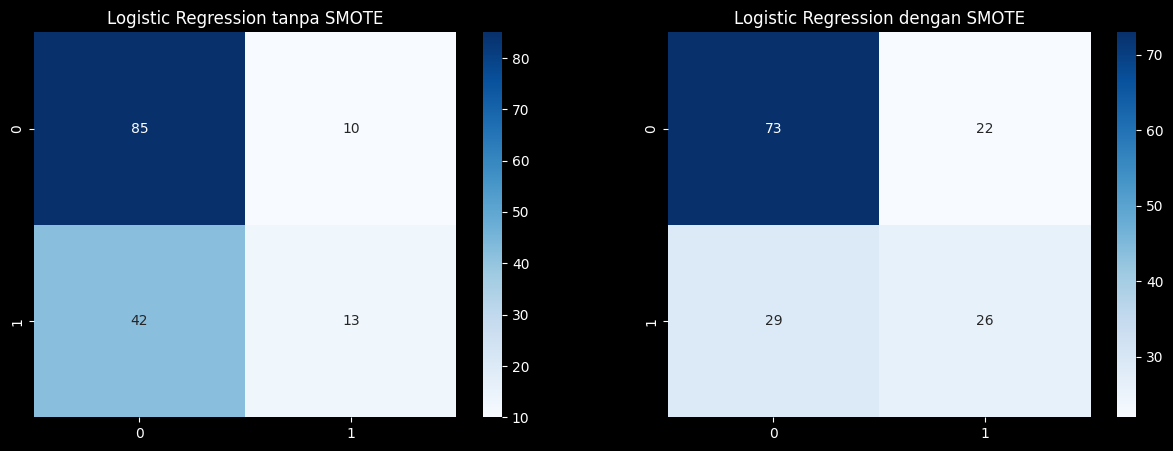

In [19]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

# tanpa SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, cmap='Blues', fmt='g', ax=ax[0])
ax[0].set_title('Logistic Regression tanpa SMOTE')

# dengan SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_logreg_sm), annot=True, cmap='Blues', fmt='g', ax=ax[1])
ax[1].set_title('Logistic Regression dengan SMOTE')

### ROC AUC Curve

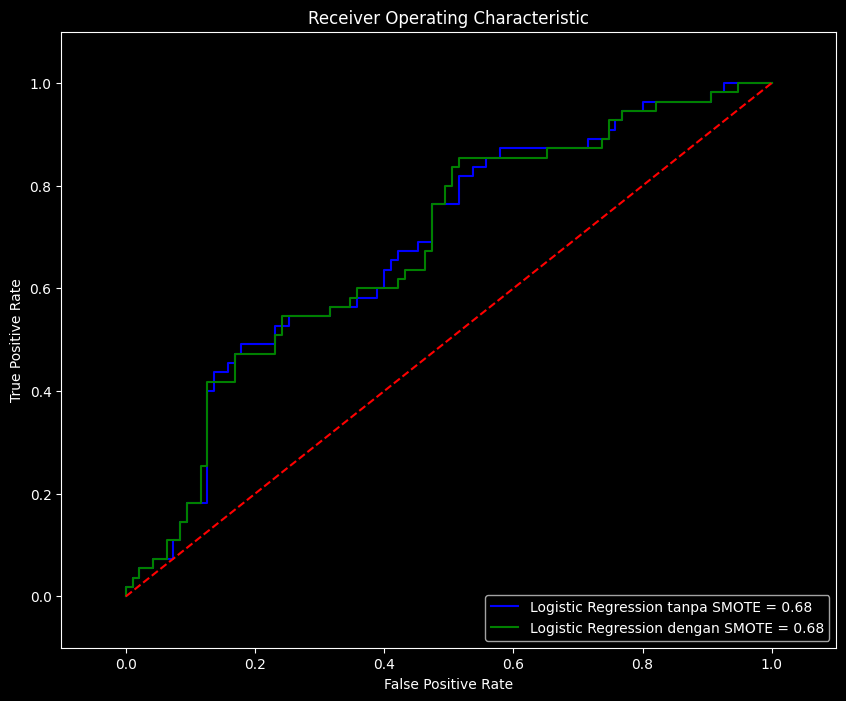

In [20]:
# Roc Auc Curve
y_pred_logreg_proba = logreg.predict_proba(X_test_scaled)[:,1]
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(y_test, y_pred_logreg_proba)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

y_pred_logreg_sm_proba = logreg.predict_proba(X_test_sm_scaled)[:,1]
fpr_logreg_sm, tpr_logreg_sm, threshold_logreg_sm = roc_curve(y_test, y_pred_logreg_sm_proba)
roc_auc_logreg_sm = auc(fpr_logreg_sm, tpr_logreg_sm)

plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_logreg, tpr_logreg, 'b', label='Logistic Regression tanpa SMOTE = %0.2f' % roc_auc_logreg)
plt.plot(fpr_logreg_sm, tpr_logreg_sm, 'g', label='Logistic Regression dengan SMOTE = %0.2f' % roc_auc_logreg_sm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest

### Model Random Forest

In [21]:
# random forest
rf = RandomForestClassifier()

In [22]:
# tanpa SMOTE
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# dengan SMOTE
rf.fit(X_train_sm_scaled, y_train_sm)
y_pred_rf_sm = rf.predict(X_test_sm_scaled)

### Evaluation Random Forest

### Accuracy

In [23]:
# evaluation tanpa SMOTE
print('Random Forest tanpa SMOTE')
print('Accuracy Score :', accuracy_score(y_test, y_pred_rf))
print('-'*50)
# evaluation dengan SMOTE
print('Random Forest dengan SMOTE')
print('Accuracy Score :', accuracy_score(y_test, y_pred_rf_sm))

Random Forest tanpa SMOTE
Accuracy Score : 0.68
--------------------------------------------------
Random Forest dengan SMOTE
Accuracy Score : 0.6866666666666666


### Confusion Matrix

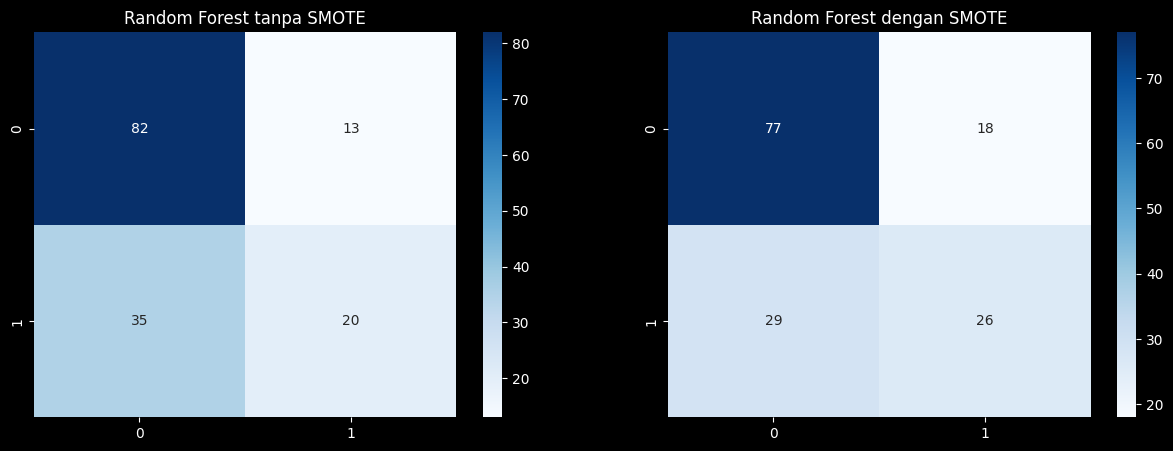

In [24]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

# tanpa SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Blues', fmt='g', ax=ax[0])
ax[0].set_title('Random Forest tanpa SMOTE')

# dengan SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_rf_sm), annot=True, cmap='Blues', fmt='g', ax=ax[1])
ax[1].set_title('Random Forest dengan SMOTE')
plt.show()

### ROC AUC Curve

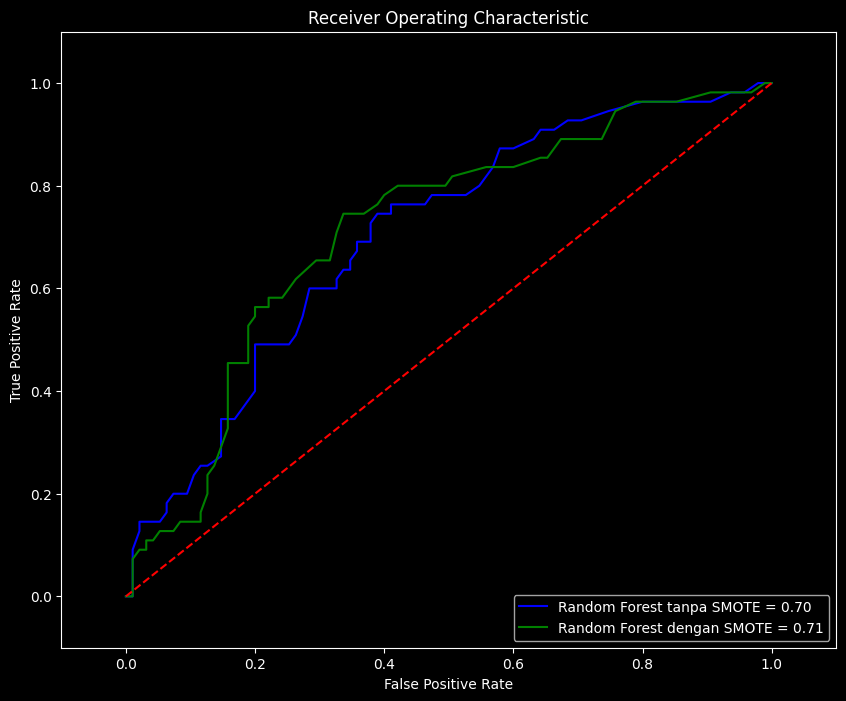

In [25]:
# Roc Auc Curve
y_pred_rf_proba = rf.predict_proba(X_test_scaled)[:,1]
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, y_pred_rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)

y_pred_rf_sm_proba = rf.predict_proba(X_test_sm_scaled)[:,1]
fpr_rf_sm, tpr_rf_sm, threshold_rf_sm = roc_curve(y_test, y_pred_rf_sm_proba)
roc_auc_rf_sm = auc(fpr_rf_sm, tpr_rf_sm)

plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_rf, tpr_rf, 'b', label='Random Forest tanpa SMOTE = %0.2f' % roc_auc_rf)
plt.plot(fpr_rf_sm, tpr_rf_sm, 'g', label='Random Forest dengan SMOTE = %0.2f' % roc_auc_rf_sm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Decision Tree

### Model Decision Tree

In [26]:
dt = DecisionTreeClassifier()

In [27]:
# tanpa SMOTE
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

# dengan SMOTE
dt.fit(X_train_sm_scaled, y_train_sm)
y_pred_dt_sm = dt.predict(X_test_sm_scaled)

## Evaluation Decision Tree

### Accuracy

In [28]:
# evaluation tanpa SMOTE
print('Decision Tree tanpa SMOTE')
print('Accuracy Score :', accuracy_score(y_test, y_pred_dt))
print('-'*50)
# evaluation dengan SMOTE
print('Decision Tree dengan SMOTE')
print('Accuracy Score :', accuracy_score(y_test, y_pred_dt_sm))

Decision Tree tanpa SMOTE
Accuracy Score : 0.62
--------------------------------------------------
Decision Tree dengan SMOTE
Accuracy Score : 0.6466666666666666


### Confusion Matrix

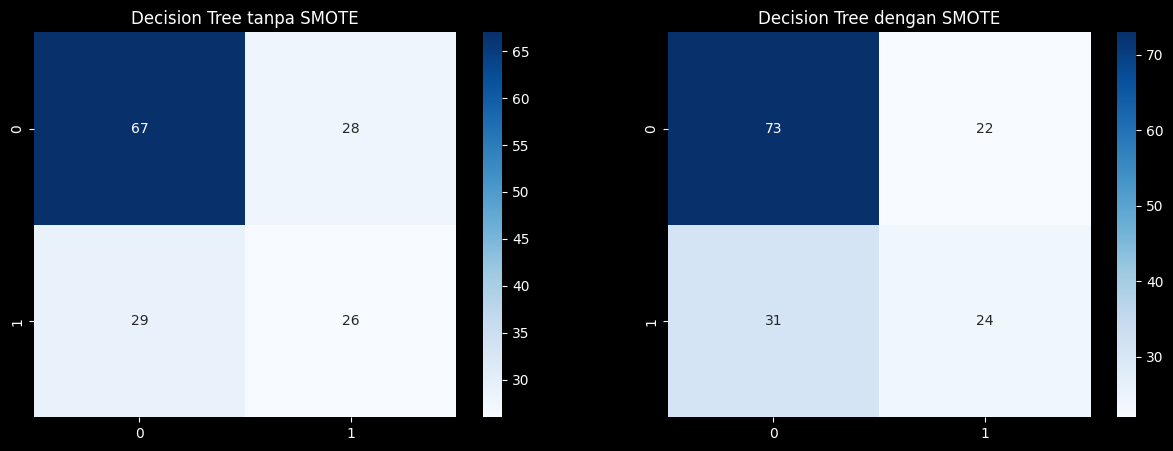

In [29]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
# tanpa SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='Blues', fmt='g', ax=ax[0])
ax[0].set_title('Decision Tree tanpa SMOTE')

# dengan SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_dt_sm), annot=True, cmap='Blues', fmt='g', ax=ax[1])
ax[1].set_title('Decision Tree dengan SMOTE')
plt.show()

### ROC AUC Curve

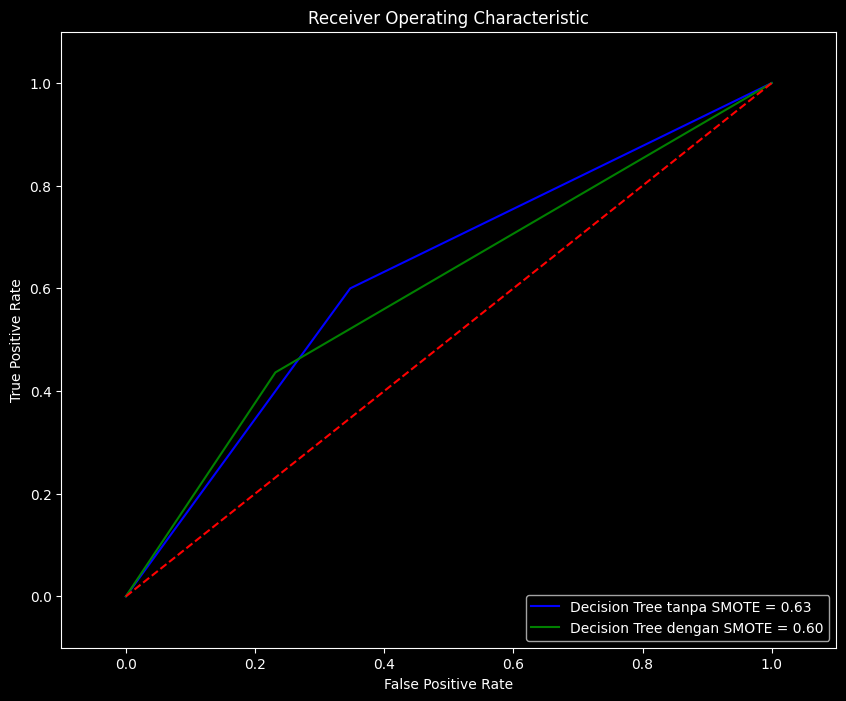

In [30]:
# Roc Auc Curve
y_pred_dt_proba = dt.predict_proba(X_test_scaled)[:,1]
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, y_pred_dt_proba)
roc_auc_dt = auc(fpr_dt, tpr_dt)

y_pred_dt_sm_proba = dt.predict_proba(X_test_sm_scaled)[:,1]
fpr_dt_sm, tpr_dt_sm, threshold_dt_sm = roc_curve(y_test, y_pred_dt_sm_proba)
roc_auc_dt_sm = auc(fpr_dt_sm, tpr_dt_sm)

plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_dt, tpr_dt, 'b', label='Decision Tree tanpa SMOTE = %0.2f' % roc_auc_dt)
plt.plot(fpr_dt_sm, tpr_dt_sm, 'g', label='Decision Tree dengan SMOTE = %0.2f' % roc_auc_dt_sm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Gradient Boosting

### Model Gradient Boosting

In [31]:
# Gradient Boosting
gb = GradientBoostingClassifier()

In [32]:
# tanpa SMOTE
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

# dengan SMOTE
gb.fit(X_train_sm_scaled, y_train_sm)
y_pred_gb_sm = gb.predict(X_test_sm_scaled)

### Accuracy

In [33]:
# evaluation tanpa SMOTE
print('Gradient Boosting tanpa SMOTE')
print('Accuracy Score :', accuracy_score(y_test, y_pred_gb))
print('-'*50)
# evaluation dengan SMOTE
print('Gradient Boosting dengan SMOTE')
print('Accuracy Score :', accuracy_score(y_test, y_pred_gb_sm))

Gradient Boosting tanpa SMOTE
Accuracy Score : 0.7
--------------------------------------------------
Gradient Boosting dengan SMOTE
Accuracy Score : 0.6733333333333333


### Confusion Matrix

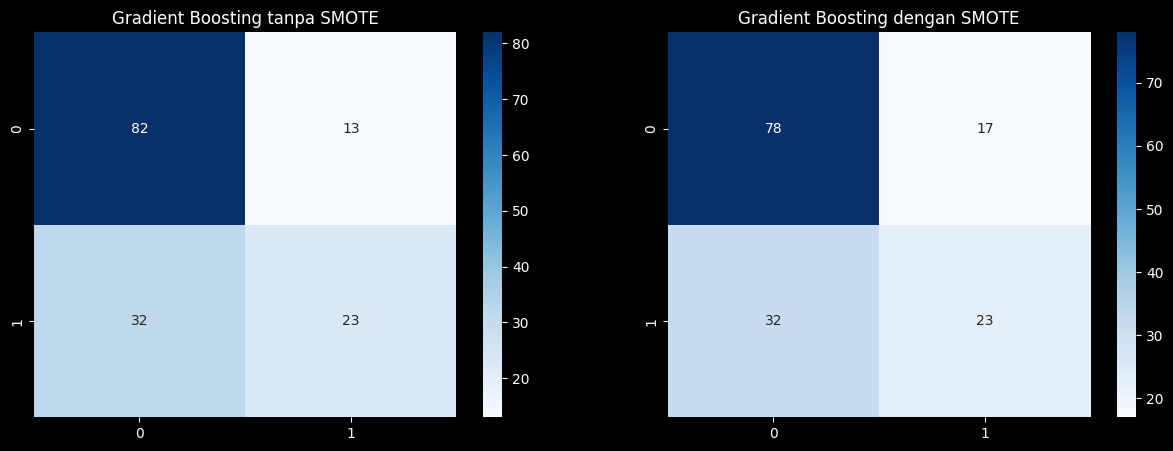

In [34]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
# tanpa SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, cmap='Blues', fmt='g', ax=ax[0])
ax[0].set_title('Gradient Boosting tanpa SMOTE')

# dengan SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_gb_sm), annot=True, cmap='Blues', fmt='g', ax=ax[1])
ax[1].set_title('Gradient Boosting dengan SMOTE')
plt.show()

### ROC AUC Curve

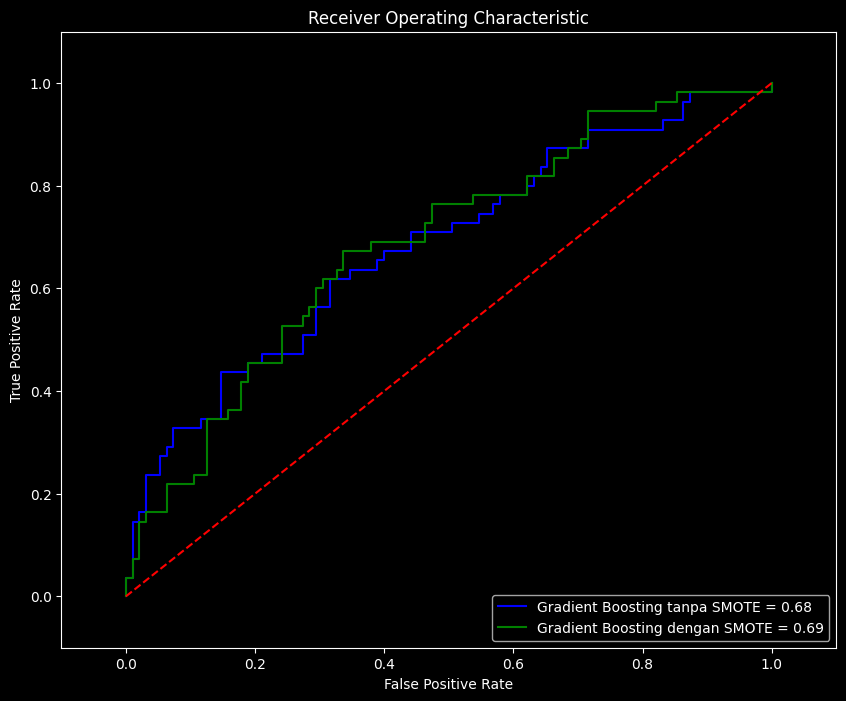

In [35]:
y_pred_gb_proba = gb.predict_proba(X_test_scaled)[:,1]
fpr_gb, tpr_gb, threshold_gb = roc_curve(y_test, y_pred_gb_proba)
roc_auc_gb = auc(fpr_gb, tpr_gb)

y_pred_gb_sm_proba = gb.predict_proba(X_test_sm_scaled)[:,1]
fpr_gb_sm, tpr_gb_sm, threshold_gb_sm = roc_curve(y_test, y_pred_gb_sm_proba)
roc_auc_gb_sm = auc(fpr_gb_sm, tpr_gb_sm)

plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_gb, tpr_gb, 'b', label='Gradient Boosting tanpa SMOTE = %0.2f' % roc_auc_gb)
plt.plot(fpr_gb_sm, tpr_gb_sm, 'g', label='Gradient Boosting dengan SMOTE = %0.2f' % roc_auc_gb_sm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Model XGBoost

### Model XGBoost

In [36]:
xgb = XGBClassifier()

In [37]:
# tanpa SMOTE
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

# dengan SMOTE
xgb.fit(X_train_sm_scaled, y_train_sm)
y_pred_xgb_sm = xgb.predict(X_test_sm_scaled)

### Accuracy

In [38]:
# evaluation tanpa SMOTE
print('XGBoost tanpa SMOTE')
print('Accuracy Score :', accuracy_score(y_test, y_pred_xgb))
print('-'*50)
# evaluation dengan SMOTE
print('XGBoost dengan SMOTE')
print('Accuracy Score :', accuracy_score(y_test, y_pred_xgb_sm))

XGBoost tanpa SMOTE
Accuracy Score : 0.6933333333333334
--------------------------------------------------
XGBoost dengan SMOTE
Accuracy Score : 0.7066666666666667


### Confusion Matrix

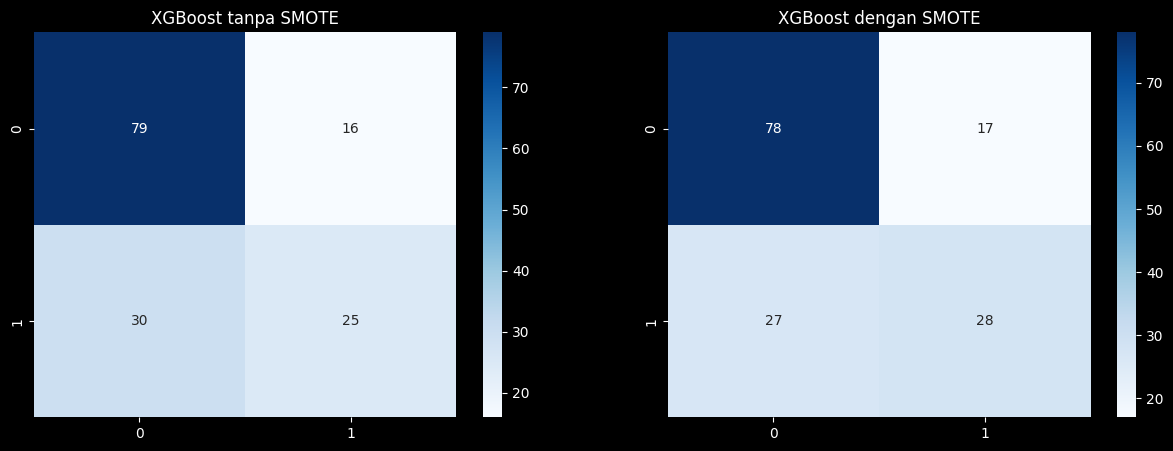

In [39]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
# tanpa SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, cmap='Blues', fmt='g', ax=ax[0])
ax[0].set_title('XGBoost tanpa SMOTE')

# dengan SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_sm), annot=True, cmap='Blues', fmt='g', ax=ax[1])
ax[1].set_title('XGBoost dengan SMOTE')
plt.show()

### ROC AUC Curve

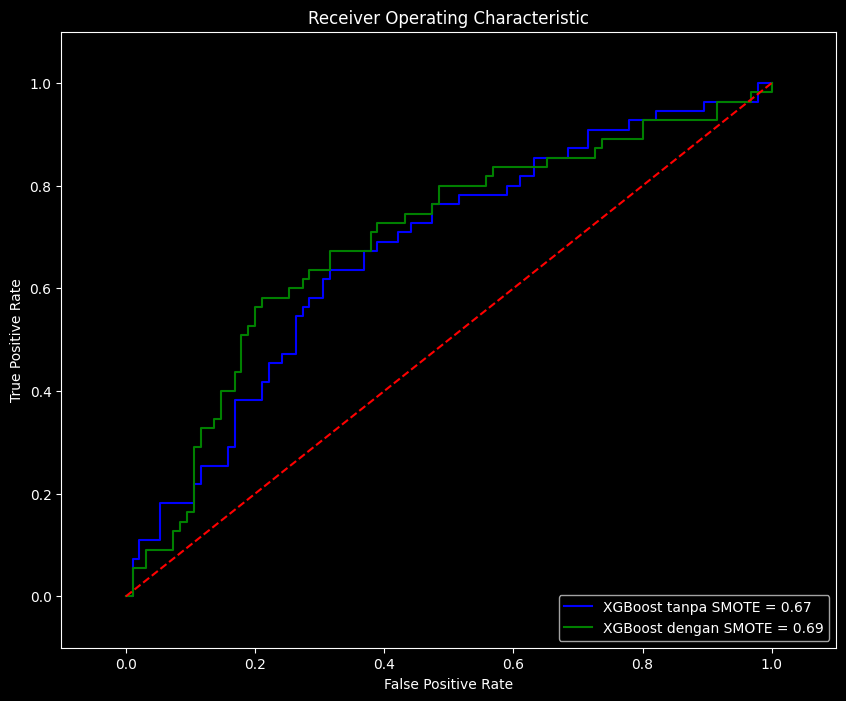

In [40]:
y_pred_xgb_proba = xgb.predict_proba(X_test_scaled)[:,1]
fpr_xgb, tpr_xgb, threshold_xgb = roc_curve(y_test, y_pred_xgb_proba)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

y_pred_xgb_sm_proba = xgb.predict_proba(X_test_sm_scaled)[:,1]
fpr_xgb_sm, tpr_xgb_sm, threshold_xgb_sm = roc_curve(y_test, y_pred_xgb_sm_proba)
roc_auc_xgb_sm = auc(fpr_xgb_sm, tpr_xgb_sm)

plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_xgb, tpr_xgb, 'b', label='XGBoost tanpa SMOTE = %0.2f' % roc_auc_xgb)
plt.plot(fpr_xgb_sm, tpr_xgb_sm, 'g', label='XGBoost dengan SMOTE = %0.2f' % roc_auc_xgb_sm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## AdaBoost

### Model AdaBoost

In [41]:
# ada boost
ada = AdaBoostClassifier()

In [42]:
# tanpa SMOTE
ada.fit(X_train_scaled, y_train)
y_pred_ada = ada.predict(X_test_scaled)

# dengan SMOTE
ada.fit(X_train_sm_scaled, y_train_sm)
y_pred_ada_sm = ada.predict(X_test_sm_scaled)

### Accuracy

In [43]:
# evaluation tanpa SMOTE
print('Ada Boost tanpa SMOTE')
print('Accuracy Score :', accuracy_score(y_test, y_pred_ada))
print('-'*50)
# evaluation dengan SMOTE
print('Ada Boost dengan SMOTE')
print('Accuracy Score :', accuracy_score(y_test, y_pred_ada_sm))

Ada Boost tanpa SMOTE
Accuracy Score : 0.68
--------------------------------------------------
Ada Boost dengan SMOTE
Accuracy Score : 0.6733333333333333


### Confusion Matrix

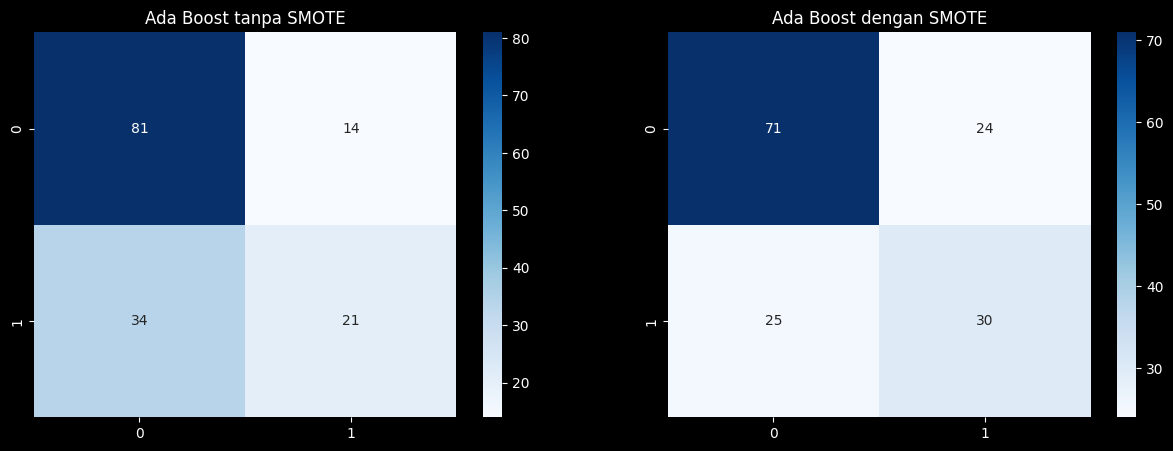

In [44]:
# confusion matrix
fig, ax = plt.subplots(1,2, figsize=(15,5))
# tanpa SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_ada), annot=True, cmap='Blues', fmt='g', ax=ax[0])
ax[0].set_title('Ada Boost tanpa SMOTE')

# dengan SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_ada_sm), annot=True, cmap='Blues', fmt='g', ax=ax[1])
ax[1].set_title('Ada Boost dengan SMOTE')
plt.show()

### ROC AUC Curve

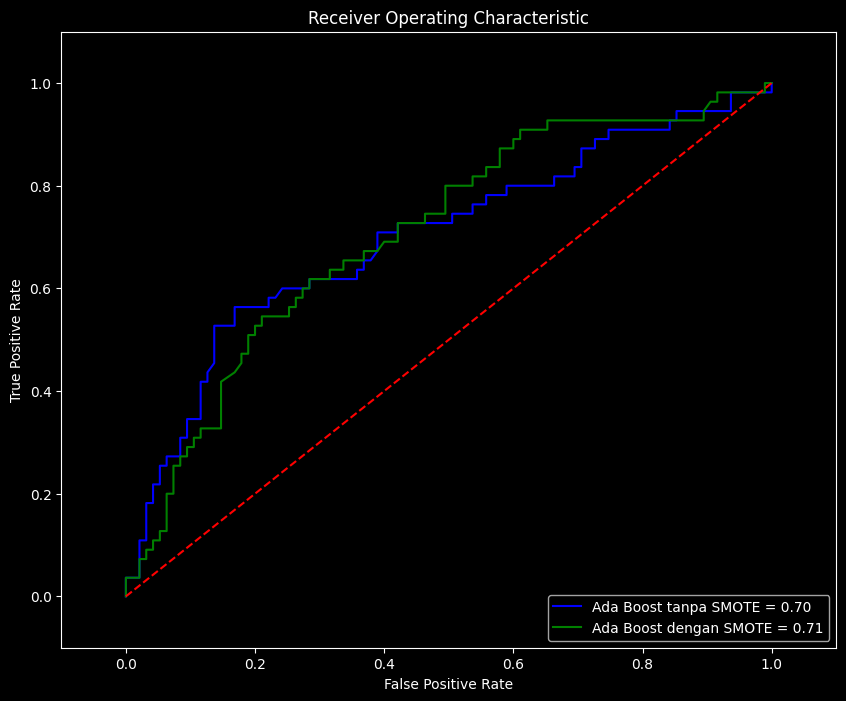

In [45]:
# Roc Auc Curve
y_pred_ada_proba = ada.predict_proba(X_test_scaled)[:,1]
fpr_ada, tpr_ada, threshold_ada = roc_curve(y_test, y_pred_ada_proba)
roc_auc_ada = auc(fpr_ada, tpr_ada)

y_pred_ada_sm_proba = ada.predict_proba(X_test_sm_scaled)[:,1]
fpr_ada_sm, tpr_ada_sm, threshold_ada_sm = roc_curve(y_test, y_pred_ada_sm_proba)
roc_auc_ada_sm = auc(fpr_ada_sm, tpr_ada_sm)

plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_ada, tpr_ada, 'b', label='Ada Boost tanpa SMOTE = %0.2f' % roc_auc_ada)
plt.plot(fpr_ada_sm, tpr_ada_sm, 'g', label='Ada Boost dengan SMOTE = %0.2f' % roc_auc_ada_sm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Voting Classifier

### Model Voting Classifier

In [46]:
# voting classifier
voting = VotingClassifier(estimators=[('logreg', logreg), ('rf', rf), ('dt', dt), 
                                      ('gb', gb), ('xgb', xgb), ('ada', ada)], voting='soft')

In [47]:
# tanpa SMOTE
voting.fit(X_train_scaled, y_train)
y_pred_voting = voting.predict(X_test_scaled)

# dengan SMOTE
voting.fit(X_train_sm_scaled, y_train_sm)
y_pred_voting_sm = voting.predict(X_test_sm_scaled)

In [48]:
# evaluation tanpa SMOTE
print('Voting Classifier tanpa SMOTE')
print('Accuracy Score :', accuracy_score(y_test, y_pred_voting))
print('-'*50)
# evaluation dengan SMOTE
print('Voting Classifier dengan SMOTE')
print('Accuracy Score :', accuracy_score(y_test, y_pred_voting_sm))

Voting Classifier tanpa SMOTE
Accuracy Score : 0.7066666666666667
--------------------------------------------------
Voting Classifier dengan SMOTE
Accuracy Score : 0.6933333333333334


### Confusion Matrix

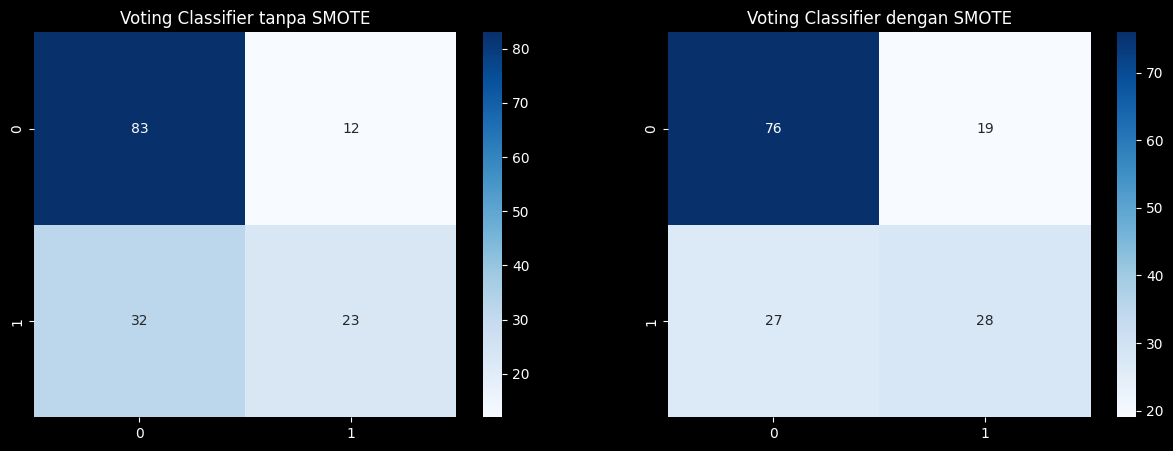

In [49]:
# confusion matrix
fig, ax = plt.subplots(1,2, figsize=(15,5))
# tanpa SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_voting), annot=True, cmap='Blues', fmt='g', ax=ax[0])
ax[0].set_title('Voting Classifier tanpa SMOTE')

# dengan SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_voting_sm), annot=True, cmap='Blues', fmt='g', ax=ax[1])
ax[1].set_title('Voting Classifier dengan SMOTE')
plt.show()

### ROC AUC Curve

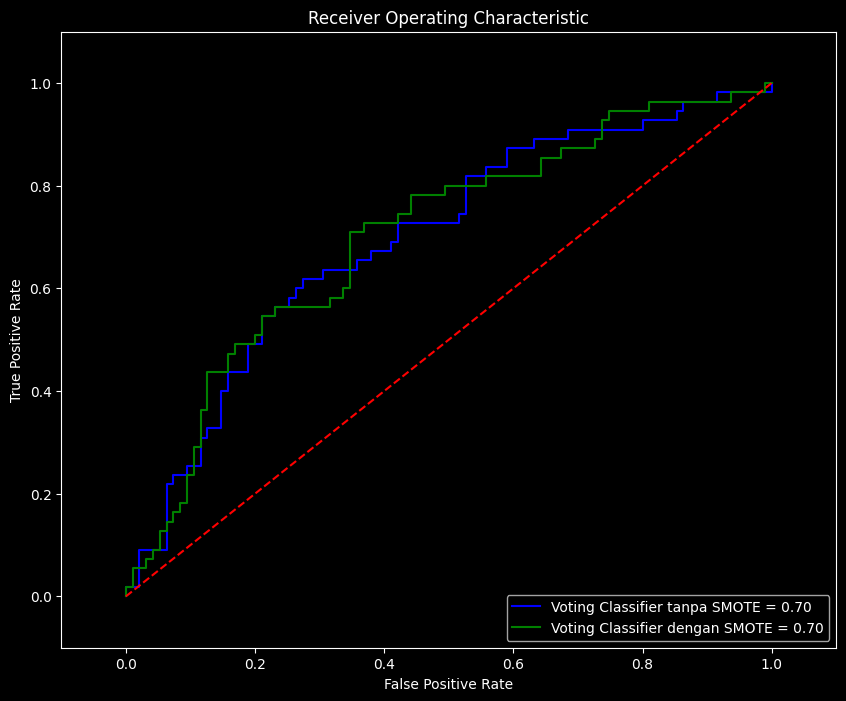

In [50]:
# Roc Auc Curve
y_pred_voting_proba = voting.predict_proba(X_test_scaled)[:,1]
fpr_voting, tpr_voting, threshold_voting = roc_curve(y_test, y_pred_voting_proba)
roc_auc_voting = auc(fpr_voting, tpr_voting)

y_pred_voting_sm_proba = voting.predict_proba(X_test_sm_scaled)[:,1]
fpr_voting_sm, tpr_voting_sm, threshold_voting_sm = roc_curve(y_test, y_pred_voting_sm_proba)
roc_auc_voting_sm = auc(fpr_voting_sm, tpr_voting_sm)

plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_voting, tpr_voting, 'b', label='Voting Classifier tanpa SMOTE = %0.2f' % roc_auc_voting)
plt.plot(fpr_voting_sm, tpr_voting_sm, 'g', label='Voting Classifier dengan SMOTE = %0.2f' % roc_auc_voting_sm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Melihat hasil dari semua model

### Melihat hasil dari semua model berdasarkan AUC Score

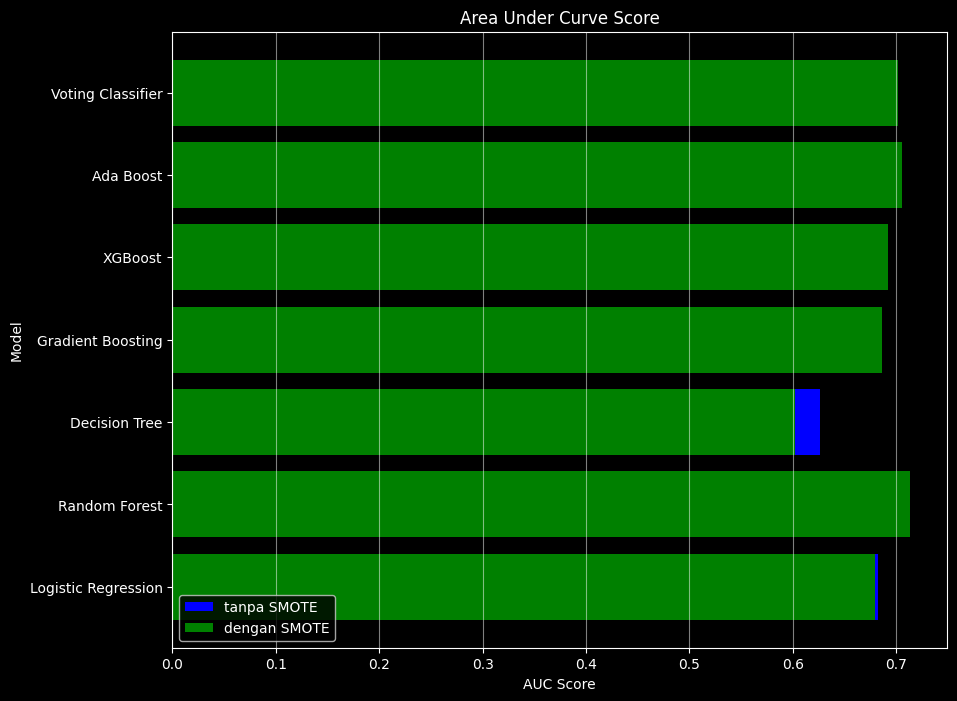

In [51]:
# visualisasi hasil auc score
auc_score = [roc_auc_logreg, roc_auc_rf, roc_auc_dt, roc_auc_gb, roc_auc_xgb, roc_auc_ada, roc_auc_voting]
auc_score_sm = [roc_auc_logreg_sm, roc_auc_rf_sm, roc_auc_dt_sm, roc_auc_gb_sm, roc_auc_xgb_sm, roc_auc_ada_sm, roc_auc_voting_sm]
model = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting', 'XGBoost', 'Ada Boost', 'Voting Classifier']

plt.figure(figsize=(10,8))
plt.barh(model, auc_score, color='b', label='tanpa SMOTE')
plt.barh(model, auc_score_sm, color='g',  label='dengan SMOTE')
plt.title('Area Under Curve Score')
plt.xlabel('AUC Score')
plt.ylabel('Model')
plt.legend(['tanpa SMOTE', 'dengan SMOTE'], loc = 'lower left')
plt.grid( axis='x', alpha=0.5)
plt.show()

### Melihat hasil dari semua model berdasarkan Accuracy

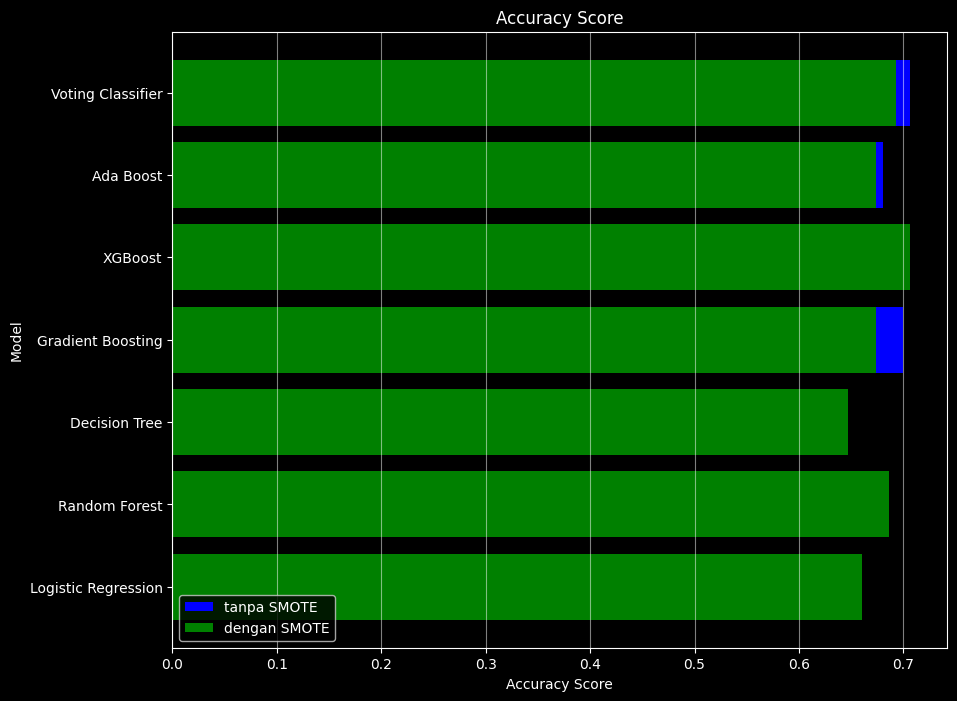

In [52]:
# visualisasi hasil accuracy score
acc_score = [accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_dt),
                accuracy_score(y_test, y_pred_gb), accuracy_score(y_test, y_pred_xgb), accuracy_score(y_test, y_pred_ada),
                accuracy_score(y_test, y_pred_voting)]
acc_score_sm = [accuracy_score(y_test, y_pred_logreg_sm), accuracy_score(y_test, y_pred_rf_sm), accuracy_score(y_test, y_pred_dt_sm),
                accuracy_score(y_test, y_pred_gb_sm), accuracy_score(y_test, y_pred_xgb_sm), accuracy_score(y_test, y_pred_ada_sm),
                accuracy_score(y_test, y_pred_voting_sm)]

plt.figure(figsize=(10,8))
plt.barh(model, acc_score, color='b', label='tanpa SMOTE')
plt.barh(model, acc_score_sm, color='g',  label='dengan SMOTE')
plt.title('Accuracy Score')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.legend(['tanpa SMOTE', 'dengan SMOTE'], loc = 'lower left')
plt.grid( axis='x', alpha=0.5)
plt.show()

### Kesimpulan

dari hasil di atas, dapat dilihat bahwa model yang memiliki nilai AUC Score tertinggi adalah model Gradient boosting dam Voting Classifer, lau model yang memiliki nilai accuracy tertinggi adalah model Gradient Boosting. tetapi karena dataset yang digunakan tidak terlalu banyak, maka kita akan menggunakan model XGBoost untuk memprediksi data test.

## Hyperparameter Tuning

Hyperparameter tuning dilakukan pada model Gradient boosting karena dari model tersebut memiliki nilai akurasi dan AUC Score yang cukup tinggi.

In [59]:
# Gradient Boosting
gb = GradientBoostingClassifier()

In [71]:
# parameter
param_gb = {
    'loss' : ['deviance'],
    'learning_rate' : [0.1, 0.05, 0.01],
    'min_samples_split' : np.linspace(0.1, 0.5, 3),
    'min_samples_leaf' : np.linspace(0.1, 0.5, 3),
    'max_depth' : [3, 5, 7],
    'max_features' : ['sqrt', 'log2'],
    'criterion' : ['friedman_mse', 'mse', 'mae'],
    'subsample' : [0.5, 0.7, 0.9],
    'n_estimators' : [10]
}

In [73]:
# gridsearchcv
for i in tqdm(range(100)):
    grid_gb = GridSearchCV(gb, param_gb, cv=10, n_jobs=-1)
    grid_gb.fit(X_train_scaled, y_train)

100%|██████████| 100/100 [1:03:26<00:00, 38.07s/it]


In [75]:
# evaluation setelah gridsearchcv
print('Best Score :', grid_gb.best_score_)
print('Best Param :', grid_gb.best_params_)
print('Best Estimator :', grid_gb.best_estimator_)
print('Best Index :', grid_gb.best_index_)
print('Scorer :', grid_gb.scorer_)
print('CV :', grid_gb.cv)
print('Refit Time :', grid_gb.refit_time_)
print('Classes :', grid_gb.classes_)
print('nSplits :', grid_gb.n_splits_)
print('Predict :', grid_gb.predict(X_test_scaled))
print('Score :', grid_gb.score(X_test_scaled, y_test))

Best Score : 0.8114285714285714
Best Param : {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'min_samples_split': 0.5, 'n_estimators': 10, 'subsample': 0.9}
Best Estimator : GradientBoostingClassifier(loss='deviance', max_features='log2',
                           min_samples_leaf=0.1, min_samples_split=0.5,
                           n_estimators=10, subsample=0.9)
Best Index : 35
Scorer : <function _passthrough_scorer at 0x0000025508A76940>
CV : 10
Refit Time : 0.011001348495483398
Classes : [0 1]
nSplits : 10
Predict : [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Score : 0.6333333333333333


In [83]:
# Accuracy Score setelah gridsearchcv dan sebelum gridsearchcv
print('Accuracy Score sebelum GridSearchCV :', accuracy_score(y_test, y_pred_gb))
print('Accuracy Score setelah GridSearchCV :', accuracy_score(y_test, grid_gb.predict(X_test_scaled)))

Accuracy Score sebelum GridSearchCV : 0.7
Accuracy Score setelah GridSearchCV : 0.6333333333333333


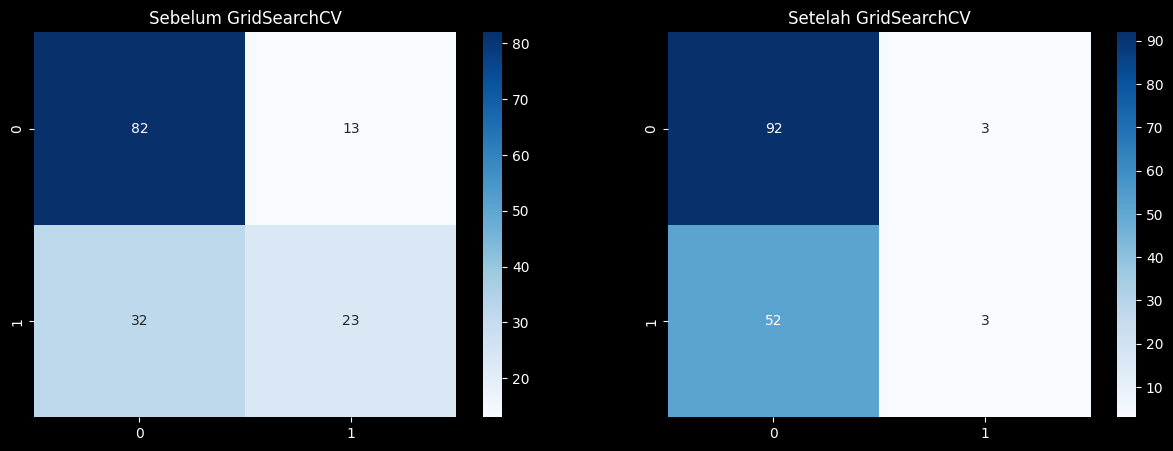

In [78]:
# confusion matrix
fig, ax = plt.subplots(1,2, figsize=(15,5))

# sebelum gridsearchcv
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, cmap='Blues', fmt='g', ax=ax[0])
ax[0].set_title('Sebelum GridSearchCV')

# setelah gridsearchcv
sns.heatmap(confusion_matrix(y_test, grid_gb.predict(X_test_scaled)), annot=True, cmap='Blues', fmt='g', ax=ax[1])
ax[1].set_title('Setelah GridSearchCV')
plt.show()

In [85]:
# Random Forest
rf = RandomForestClassifier()

In [88]:
# parameter
param_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6]
}

In [91]:
# gridsearchcv
for i in tqdm(range(100)):
    grid_rf = GridSearchCV(rf, param_rf, cv=10, n_jobs=-1)
    grid_rf.fit(X_train_sm_scaled, y_train_sm)

100%|██████████| 100/100 [54:41<00:00, 32.81s/it]


In [92]:
## evaluation setelah gridsearchcv
print('Best Score :', grid_rf.best_score_)
print('Best Param :', grid_rf.best_params_)
print('Best Estimator :', grid_rf.best_estimator_)
print('Best Index :', grid_rf.best_index_)
print('Scorer :', grid_rf.scorer_)
print('CV :', grid_rf.cv)
print('Refit Time :', grid_rf.refit_time_)
print('Classes :', grid_rf.classes_)
print('nSplits :', grid_rf.n_splits_)
print('Predict :', grid_rf.predict(X_test_sm_scaled))
print('Score :', grid_rf.score(X_test_sm_scaled, y_test))

Best Score : 0.8153679653679655
Best Param : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Estimator : RandomForestClassifier(n_estimators=50)
Best Index : 0
Scorer : <function _passthrough_scorer at 0x0000025508A76940>
CV : 10
Refit Time : 0.17200946807861328
Classes : [0 1]
nSplits : 10
Predict : [1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 0]
Score : 0.6666666666666666


In [93]:
# sebelum gridsearchcv
print('Accuracy Score sebelum GridSearchCV :', accuracy_score(y_test, y_pred_rf_sm))

# setelah gridsearchcv
print('Accuracy Score setelah GridSearchCV :', accuracy_score(y_test, grid_rf.predict(X_test_sm_scaled)))

Accuracy Score sebelum GridSearchCV : 0.6866666666666666
Accuracy Score setelah GridSearchCV : 0.6666666666666666
